# Solar ZED
## Predict energy produced by solar panels
### Marcin Wilczyński 117215 (TPD Niestacjonarne)

In [1]:
%matplotlib qt 
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("train.csv")

data.head(10)

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,...,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh
0,97595,0.425,0.083,0.083,0.437,0.631,1.000,2012,0.003,0.0,...,0.599,0.553,0.390,0.828,0.562,0.485,0.612,0.0,0.189,0.0
1,97606,0.250,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.867,0.000,0.086,0.990,0.841,0.606,0.616,0.0,0.200,0.0
2,97637,0.350,0.375,0.000,0.439,0.626,0.000,2012,0.003,0.0,...,0.072,0.432,0.257,0.884,0.597,0.539,0.614,0.0,0.158,0.0
3,97646,0.325,0.292,0.167,0.440,0.612,0.250,2012,0.003,0.0,...,1.000,1.000,0.252,0.787,1.000,0.432,0.620,0.0,0.204,0.0
4,97772,0.000,0.000,0.333,0.436,0.626,0.719,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.614,0.0,0.199,0.0
5,104492,0.375,0.417,0.000,0.552,0.154,0.125,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,1.000,0.0,0.198,0.0
6,104528,0.400,0.458,0.000,0.553,0.160,0.125,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.150,0.0,0.198,0.0
7,104601,0.125,0.167,0.167,0.415,0.691,0.000,2012,0.003,0.0,...,0.532,0.619,0.327,0.748,0.614,0.473,0.570,0.0,0.158,0.0
8,104637,0.225,0.208,0.083,0.437,0.620,0.063,2012,0.003,0.0,...,0.000,0.717,0.313,0.760,0.890,0.424,0.616,0.0,0.199,0.0
9,169235,0.075,0.083,0.083,0.437,0.624,1.000,2012,0.003,0.0,...,0.543,0.874,0.000,0.796,0.291,1.000,0.614,0.0,0.201,0.0


## Czyszczenie danych

Czyszczenie rozpoczęto od upewnienia się czy nie występują wartości puste. Następnie wykonano wykresy zależności atrybutu decyzyjnego od wszystkich innych.

E:\Users\wilcz\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

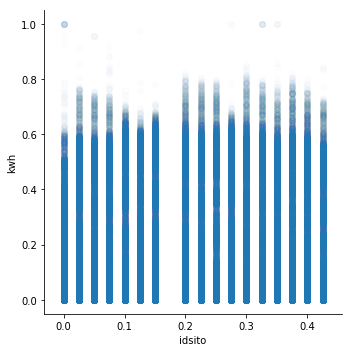

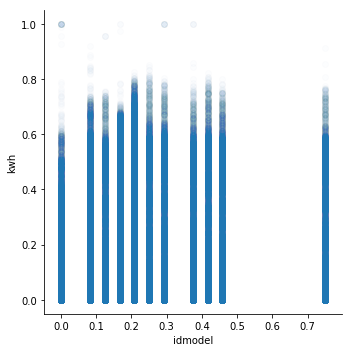

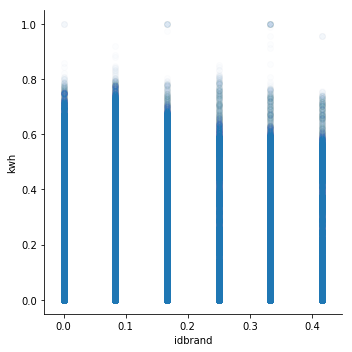

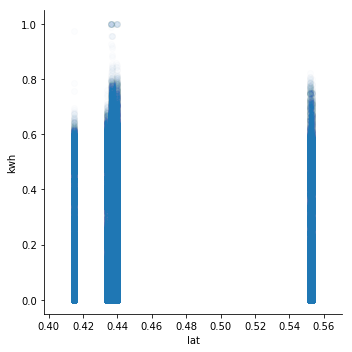

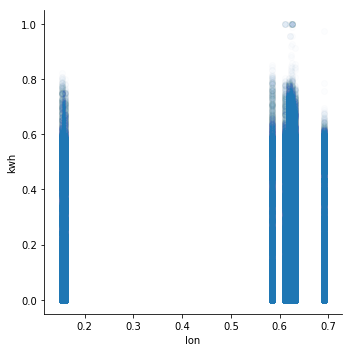

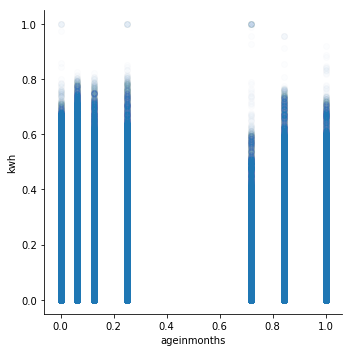

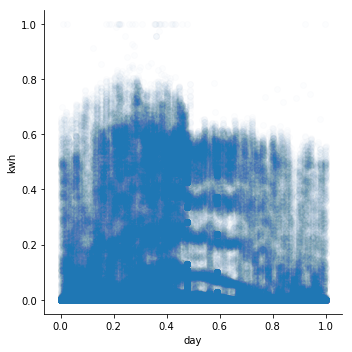

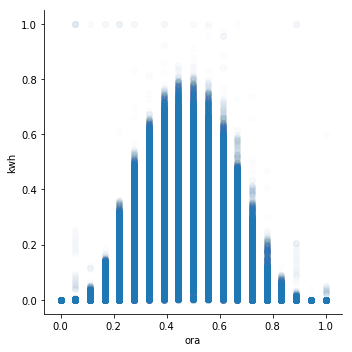

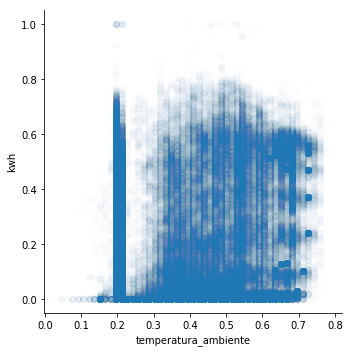

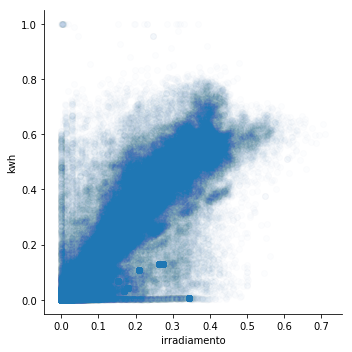

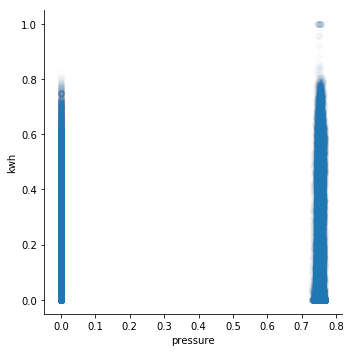

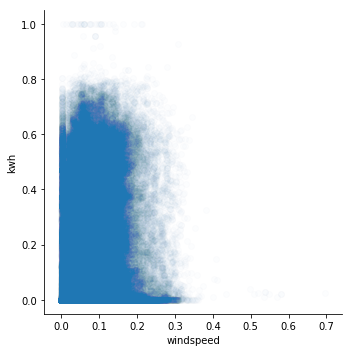

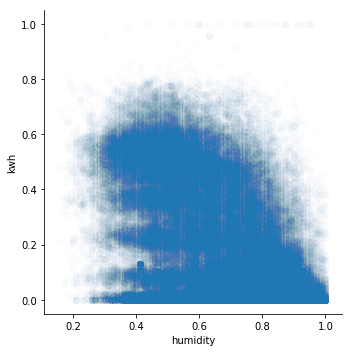

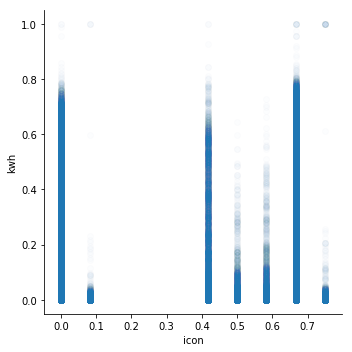

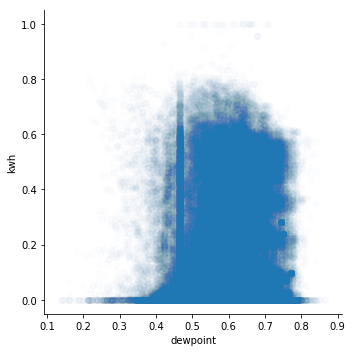

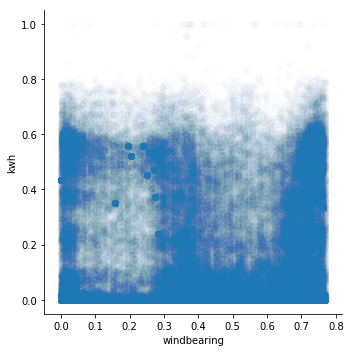

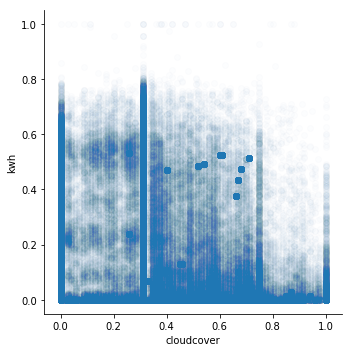

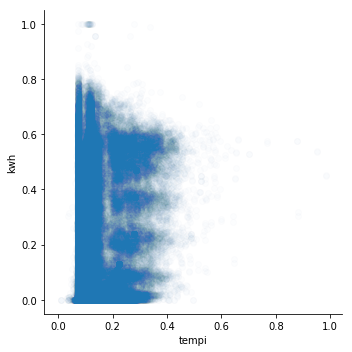

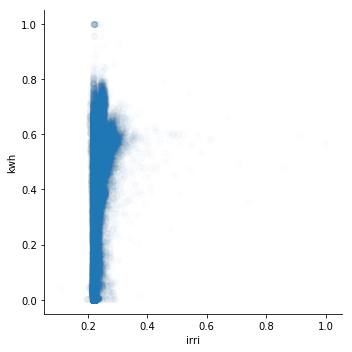

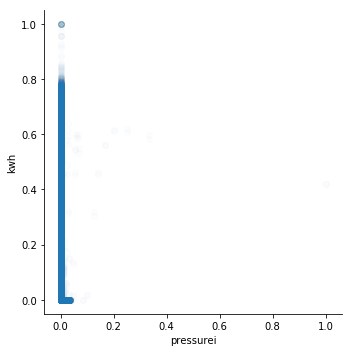

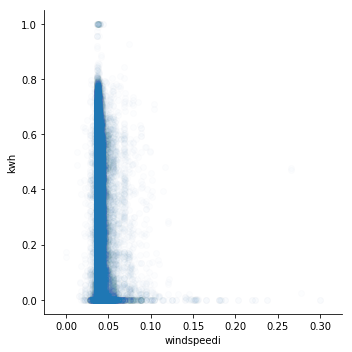

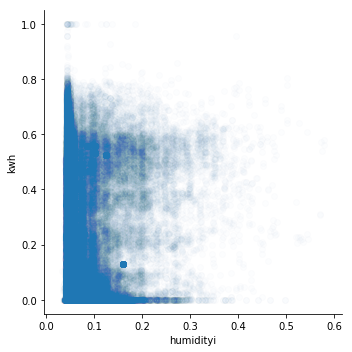

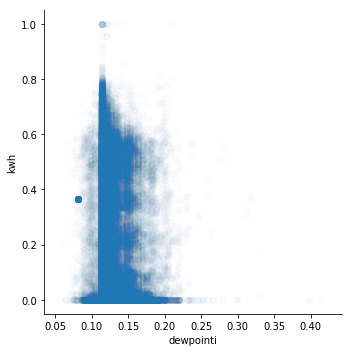

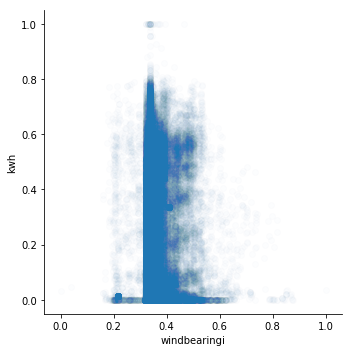

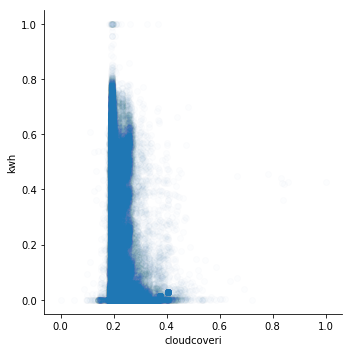

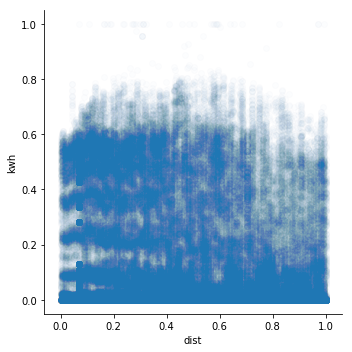

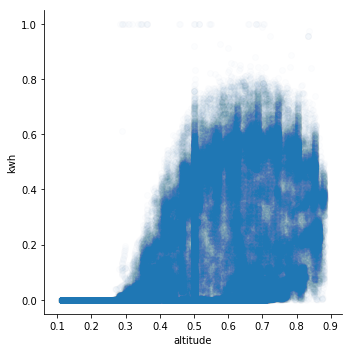

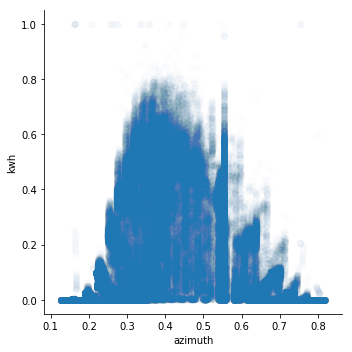

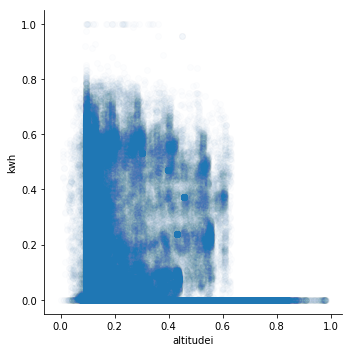

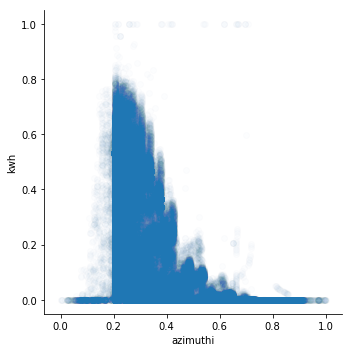

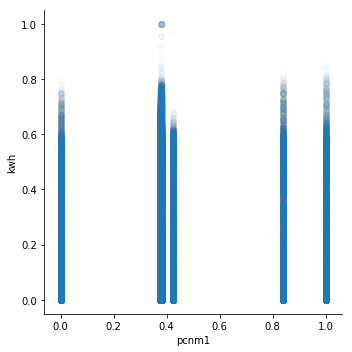

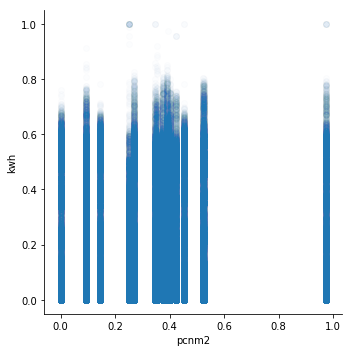

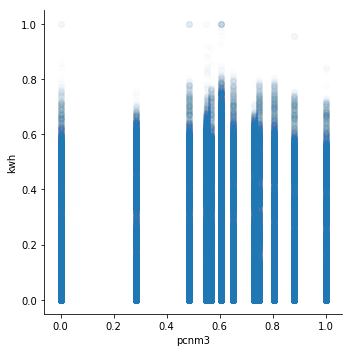

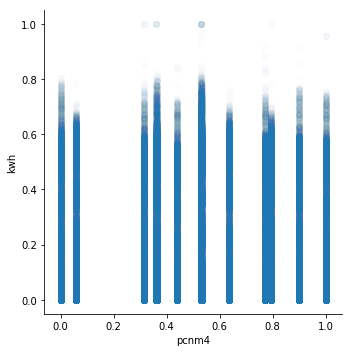

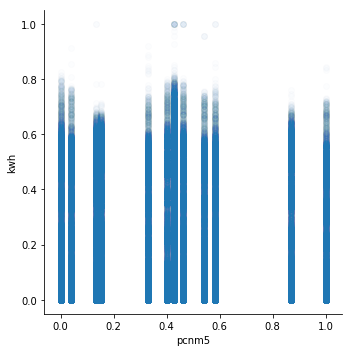

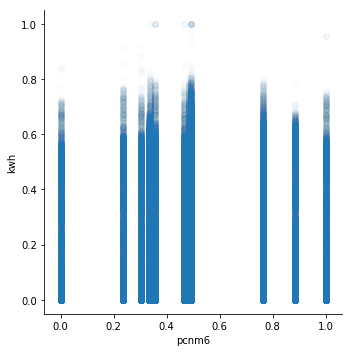

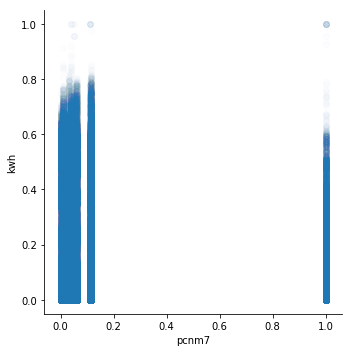

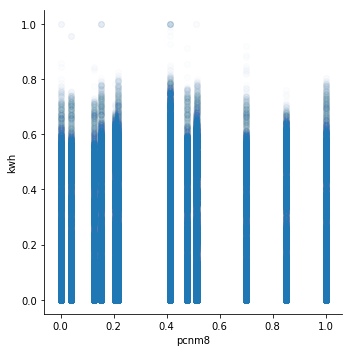

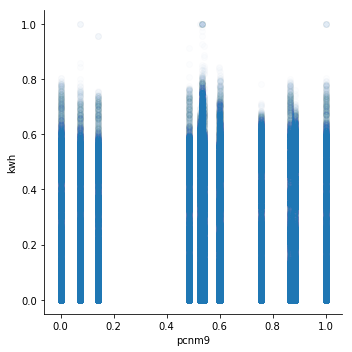

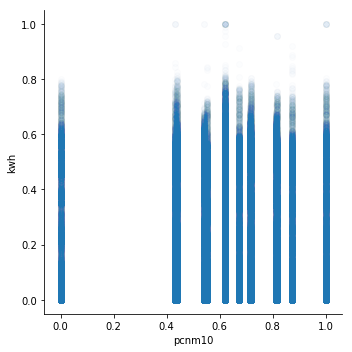

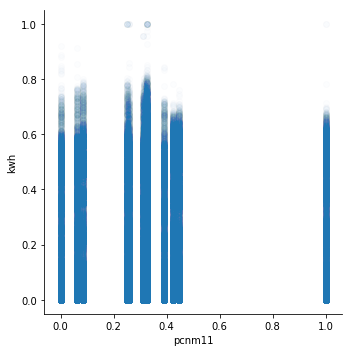

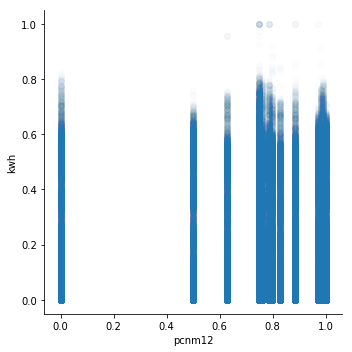

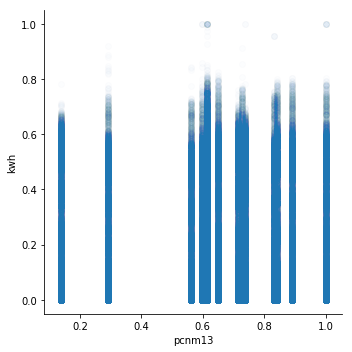

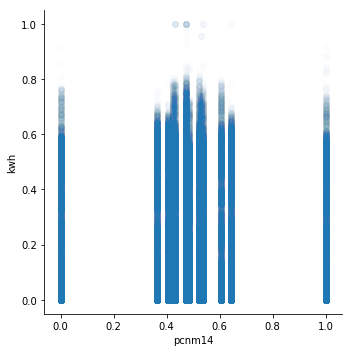

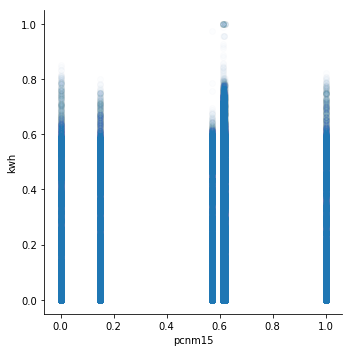

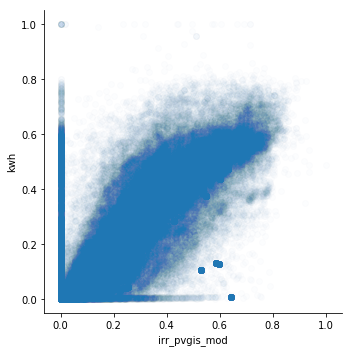

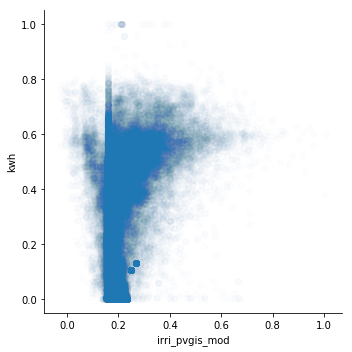

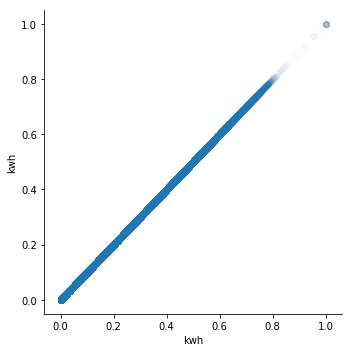

In [2]:
df1 = data.drop(columns=['id','data']).select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.lmplot(x=col, y='kwh', data=df1, fit_reg =False, scatter_kws={'alpha':0.01} )

Pierwszą parą czyszczonych atrybutów będzie kwh (produkowana energia) i irradiamento (nasłonecznienie) . Wykres zależności pokazuje, że występują miejsca w których nasłonecznienie jest 0 a produkowana energia jest niezerowa oraz produkowana energia jest 0 a nasłoneczenienie jest niezerowe. Uznano to za błędy w danych i podjęto próbę naprawienia ich.

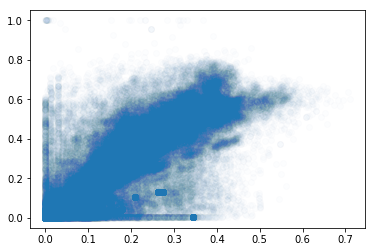

In [3]:
dt = data

plt.plot(dt.irradiamento, dt.kwh, 'o',alpha=0.01)
plt.show()

In [4]:
irr_means = data[['idsito', 'kwh', 'irradiamento']].groupby(['idsito', 'kwh'], ).mean()
kwh_means = data[['idsito', 'kwh', 'irradiamento']].groupby(['idsito', 'irradiamento'], ).mean()

In [5]:
def add_missing_irr(x):
    if((x.irradiamento == 0) & (x.kwh != 0)):
        x.irradiamento =  float(irr_means.loc[(x.idsito, x.kwh)])
    return x


temp_cleaned_data = data.apply(add_missing_irr, axis=1)

def add_missing_kwh(x):
    if((x.kwh == 0) & (x.irradiamento != 0)):
        x.kwh =  float(kwh_means.loc[(x.idsito, x.irradiamento)])
    return x

temp_cleaned_data = temp_cleaned_data.apply(add_missing_kwh, axis=1)

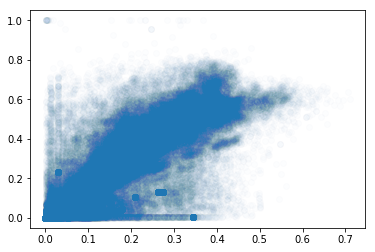

In [6]:
dt = temp_cleaned_data

plt.plot(dt.irradiamento, dt.kwh, 'o',alpha=0.01)
plt.show()

Następną parą czyszczonych atrybutów jest irr_pvgis_mod oraz kwh. Sądząc po bardzo wysokiej korelacji pomiędzy irr_pvgis_mod a irradiamento można ten atrybut uznać za jakiś wskaźnik dotyczący nasłonecznienia. Atrybuty poddano tej samej procedurze czyszczenia jak w poprzednim wypadku.

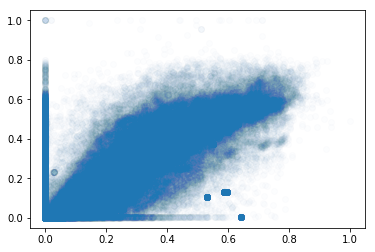

In [7]:
dt = temp_cleaned_data

plt.plot(dt.irr_pvgis_mod, dt.kwh, 'o',alpha=0.01)
plt.show()

In [8]:
ipm_means = data[['idsito', 'kwh', 'irr_pvgis_mod']].groupby(['idsito', 'kwh'], ).mean()
ipm_kwh_means = data[['idsito', 'kwh', 'irr_pvgis_mod']].groupby(['idsito', 'irr_pvgis_mod'], ).mean()

def add_missing_ipm(x):
    if((x.irr_pvgis_mod == 0) & (x.kwh != 0)):
        x.irr_pvgis_mod =  float(ipm_means.loc[(x.idsito, x.kwh)])
    return x


temp_cleaned_data = data.apply(add_missing_ipm, axis=1)

def add_missing_imp_kwh(x):
    if((x.kwh == 0) & (x.irr_pvgis_mod != 0)):
        x.kwh =  float(ipm_kwh_means.loc[(x.idsito, x.irr_pvgis_mod)])
    return x

temp_cleaned_data = temp_cleaned_data.apply(add_missing_imp_kwh, axis=1)

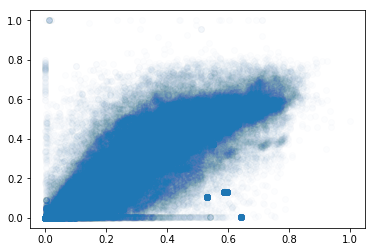

In [9]:
dt = temp_cleaned_data

plt.plot(dt.irr_pvgis_mod, dt.kwh, 'o',alpha=0.01)
plt.show()

In [10]:
data = temp_cleaned_data

Sprawdzono również rozkład atrybutu kwh.

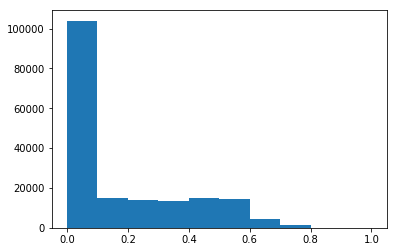

In [11]:
plt.hist(data.kwh, bins=10)
plt.show()

Następnie rozdzielono występowanie różnych wartości atrybutów kategorycznych na osobne atrybuty.

In [12]:
data = pd.get_dummies(data, columns=["idsito", "idmodel", "idbrand"])

## Budowa regresora

Jako regresor wykorzystano algorytm random forest z 40 drzewami. Nauczono go na całym zbiorze danych. Do sprawdzenia poprawności regresora użyto procedury walidacji krzyżowej.

In [13]:
X = data.drop(columns=['id','data','kwh'])
y = data.kwh

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from math import sqrt

np.random.seed(0)
from sklearn.neural_network import MLPRegressor

regressor = RandomForestRegressor(random_state=0, n_estimators=40)
score = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

score = [sqrt(x) for x in -score]
score = np.asarray(score)
print("MSE: %0.2f (+/- %0.2f)" % (score.mean(), score.std()))

E:\Users\wilcz\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MSE: 0.09 (+/- 0.03)


In [15]:
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
test = pd.read_csv("test.csv")
test_id = test.id
test = pd.get_dummies(test, columns=["idsito", "idmodel", "idbrand"])
test_X = test.drop(columns=['data', 'id'])
test_Y = regressor.predict(test_X)
d = {'Id': test_id, 'Predicted': test_Y}
df = pd.DataFrame(data=d)
df.Predicted.clip_lower(0, inplace = True)

In [17]:
df.to_csv('result.csv',index = False)